# Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.


# Outline
- <a href='#1'>1. Packages  </a> 
- <a href='#2'>2. Data</a>
    - <a href='#1.1'>2.1. loading data </a> <br>
    - <a href='#1.1'>2.2. Data overview</a> <br>
        head(), sample(), info(), describe(), nunique()
- <a href='#3'>3. Data Manipulation</a> <br>
    fix the wrong data type columns <br>
    dropna ( is a samll amount ) <br>
    change/correct the colmun name or cell content ( may create new columns )<br>
    
- <a href='#4'>4. Exploratory Data Analysis</a><br> 
    - <a href='#4.1'>4.1. univariate visualization </a><br>
            - <a href='#4.1.1'>4.1.1. univariate visualization numerical columns </a><br>
            - <a href='#4.1.2'>4.1.2. univariate visualization categorcal columns </a>
    - <a href='#4.2'>4.2. bivariate visualization </a>
    - <a href='#4.3'>4.3. multivariate visualization </a>
    - <a href='#4.4'>4.4. Correlation Matrix</a>
    
- <a href='#5'>5. Data preprocessing</a> <br>
    add new columns if needed<br>
    remove columns if needed<br>
    split featrures columns and target column <br>
    use label encoder for binary categorical coulmns ( yes/no, male/female ,....)<br>
    split numerical coulmns and categorical columns <br>
    split data x_trian, x_test , y_train, y_test<br>
    make a pipeline as known <br>
    

- <a href='#6'>6. Model Building</a> <br>
    Evaluation Metrics : ...........
    - <a href='#6.1'>6.1. Baseline Model </a>
    - <a href='#6.2'>6.2. model 2 </a>
    - <a href='#6.3'>6.3. model 3 </a>
    - <a href='#6.4'>6.4. model 4 </a>
    - <a href='#6.5'>6.5. model 5 </a>
    
- <a href='#7'>7. best model</a>
    

# <a id = '1'> 1 .packages </a>

In [1]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 

## Other
import os, joblib, missingno

## sklearn -- Preprocessing &  Transformation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

# Validating and Tuning
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## sklearn -- metrics
from sklearn.metrics import recall_score , accuracy_score , f1_score , r2_score
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve , auc
from sklearn.metrics import precision_score , precision_recall_curve , precision_recall_fscore_support

## Xgboost
import xgboost
from xgboost import XGBRegressor

## sklearn -- Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# <a id = '2'>2. Data</a>

# <a id = '1.1'>2.1 loading data</a>

In [2]:
os.getcwd()

'C:\\Users\\hmohammad\\Desktop\\udacity\\machine_learning\\learining_machine_video_corses\\m_agoor\\AI\\labs\\Churn_Classification'

In [3]:
path = os.path.join(os.getcwd() , 'WA_Fn-UseC_-Telco-Customer-Churn.csv' )
path

'C:\\Users\\hmohammad\\Desktop\\udacity\\machine_learning\\learining_machine_video_corses\\m_agoor\\AI\\labs\\Churn_Classification\\WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [4]:
churn_data = pd.read_csv(path)

# <a id = '1.2'>2.2 data review </a>

In [5]:
churn_data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6570,9626-WEQRM,Female,0,No,No,4,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,29.15,110.05,No
3169,4578-PHJYZ,Male,0,Yes,Yes,52,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,68.75,3482.85,No
6248,6549-BTYPG,Female,0,Yes,No,60,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),60.80,3603.45,No
6237,7153-OANIO,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,69.95,69.95,Yes
681,7501-IWUNG,Female,0,Yes,Yes,61,Yes,No,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),73.80,4616.05,No


In [6]:
churn_data.shape

(7043, 21)

`Features`


* `CustomerID`: A unique ID that identifies each customer.

* `Gender`: The customer’s gender: Male, Female

* `Senior Citizen`: Indicates if the customer is 65 or older: Yes, No

* `Partner` :

* `Dependents`: Indicates if the customer lives with any dependents: Yes, No. Dependents could be     children, parents, grandparents, etc.

* `Tenure` in Months: Indicates the total amount of months that the customer has been with the company

* `PhoneService` : Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

* `Multiple Lines`: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

* `Internet Service`: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

* `Online Security`: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

* `Online Backup`: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

* `Device Protection Plan`: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

* `Tech Support`: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

* `Streaming TV`: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* `Streaming Movies`: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

* `Contract`: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

* `Paperless Billing`: Indicates if the customer has chosen paperless billing: Yes, No

*` Monthly Charge`: Indicates the customer’s current total monthly charge for all their services from the company.

* `Total Charges`: Indicates the customer’s total charges, calculated to the end of the quarter specified above.


`target`
* Churn : Customers who left within the last month

In [7]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


comment : <br>
    no nuls <br>
    total charges is wrong data type , should be float not object

In [8]:
# for numerical columns only - 
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
churn_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
len(churn_data['Contract'].unique())

3

comment :<br>
    columns (gender, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling) is a pinary, columns <br>so can use label encoding , the remain categorical columns should used one hot encoder <br> the target column is churn , will use label encoder

# <a id = '3'>3. Data Manipulation </a>

In [11]:
# no alfapticall wrong data
# correct the dtype of TotalCharges columns 
# the column is real float but it shown as object and no nuls so may contain spaces " " 
churn_data['TotalCharges'] = churn_data['TotalCharges'].replace(' ', np.nan )

In [12]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


comment : <br> after replacing the spaces TotalCharges now have 11 nulls <br>
now we can change the dtype of the column

In [13]:
churn_data['TotalCharges'] = churn_data['TotalCharges'].astype('float64')

In [14]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


comment:<br> now the 'TotalCharges' is corrected ( as float64 )

In [15]:
churn_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
nulls_col = [col for col in churn_data if churn_data[col].isna().sum() > 0]
nulls_col

['TotalCharges']

comment:<br> can use the pandas.dropna() to delte the rows , but i choose the fill it in the preprossing data state 

In [17]:
churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


comment:<br>
total charges has outliers<br>
to explain:  1 - as known the mean is sencitive for outliers <br> 2- in the normal distribution the median and the mean should be closer to each others <br> i figrured out there is a big difference between the median( 50%) (1397) and the mean (2283), difference tells us there are outliers  <br> also the std is a huage number 2266 so this big that is mean the average difrences from the mean is a huage that is mean as well there are a outliers
# It is important to compare all the numbers together ( mean, median, standard deviation, maximum, minimum , ) in order to understand the data well. One number cannot tell the whole story, 
# in case of NO outliers the 25% should be close to the min and the 75% should be close to the max 
if the 25% is far from the min or the 75% if far from the max , that is mean there is outliers

# <a id = '4'>4. Exploratory Data Analysis EDA </a>

# <a id = '4.1'>4.1 univariate visualization </a>

### <a id = '4.1.1'>4.1.1 univariate visualization numerical columns </a>

<Axes: ylabel='TotalCharges'>

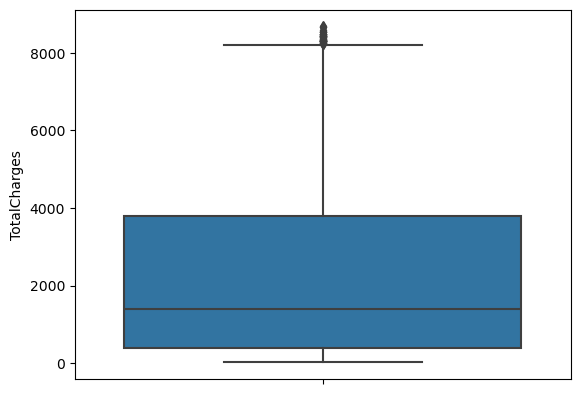

In [18]:
# plt.boxplot(churn_data['TotalCharges'])
# sns.catplot(y = 'TotalCharges', data = churn_data, kind= 'box')
sns.boxplot(y = 'TotalCharges', data = churn_data, whis=1.3)

as explained before TotalCharges column has outliers 

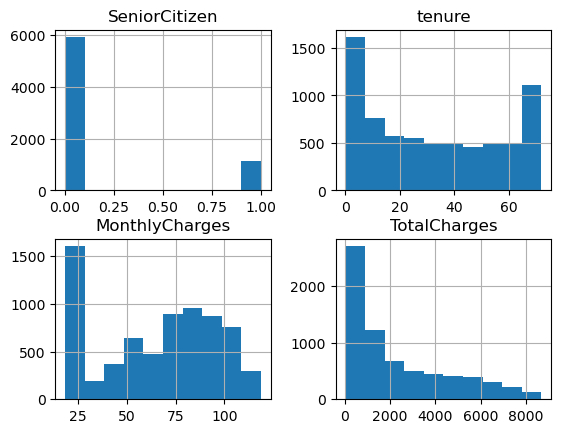

In [19]:
churn_data.hist(bins=10);

comment:<br> total charges is right skew <br> monthly charges is about to be normaly distributed <br>


C:\Users\hmohammad\AppData\Local\Temp\ipykernel_16332\1219096349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_data['MonthlyCharges'])
C:\Users\hmohammad\Anaconda3\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

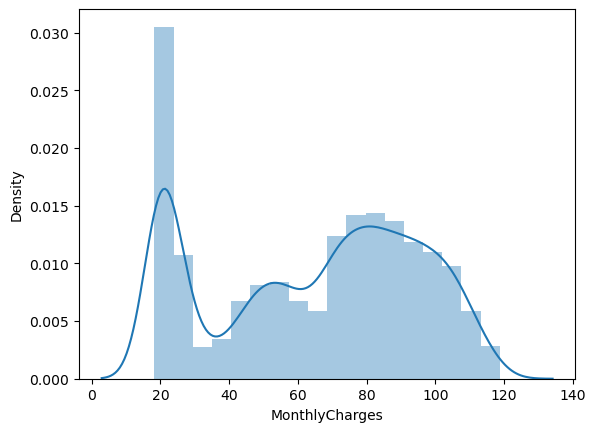

In [20]:
sns.distplot(churn_data['MonthlyCharges'])

### <a id = '4.1.2'>4.1.2 univariate visualization categorcal columns </a>

<Axes: xlabel='Churn', ylabel='count'>

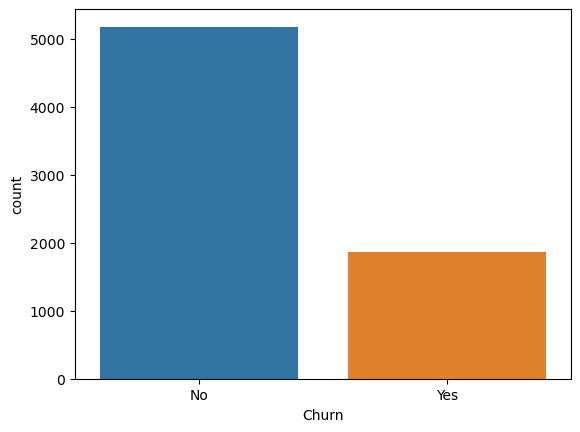

In [21]:
sns.countplot(x= 'Churn', data = churn_data)

comment:

who left the company is much smallest than who is loyal to the company 

<Axes: xlabel='gender', ylabel='count'>

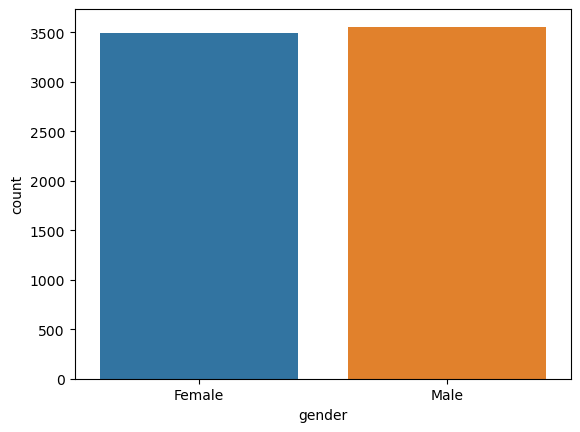

In [22]:
# study gender column using seaborn 
sns.countplot(x = 'gender', data = churn_data )

<Axes: xlabel='gender'>

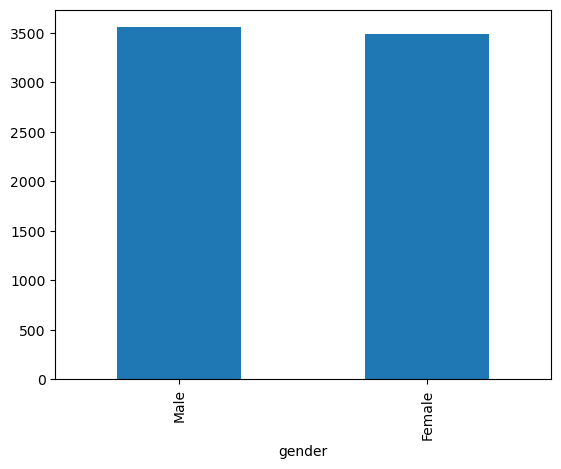

In [23]:
# study gender column using pandas 
churn_data['gender'].value_counts().plot(kind='bar')

comment:<br> gender has no effect on churn 

# <a id = '4.2'>4.2  bivariate visualization </a>


In [24]:
two_three_categorical_columns = [x for x in churn_data.drop(['SeniorCitizen','Churn'], axis = 1) 
                                 if len(churn_data[x].unique()) < 5]
two_three_categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

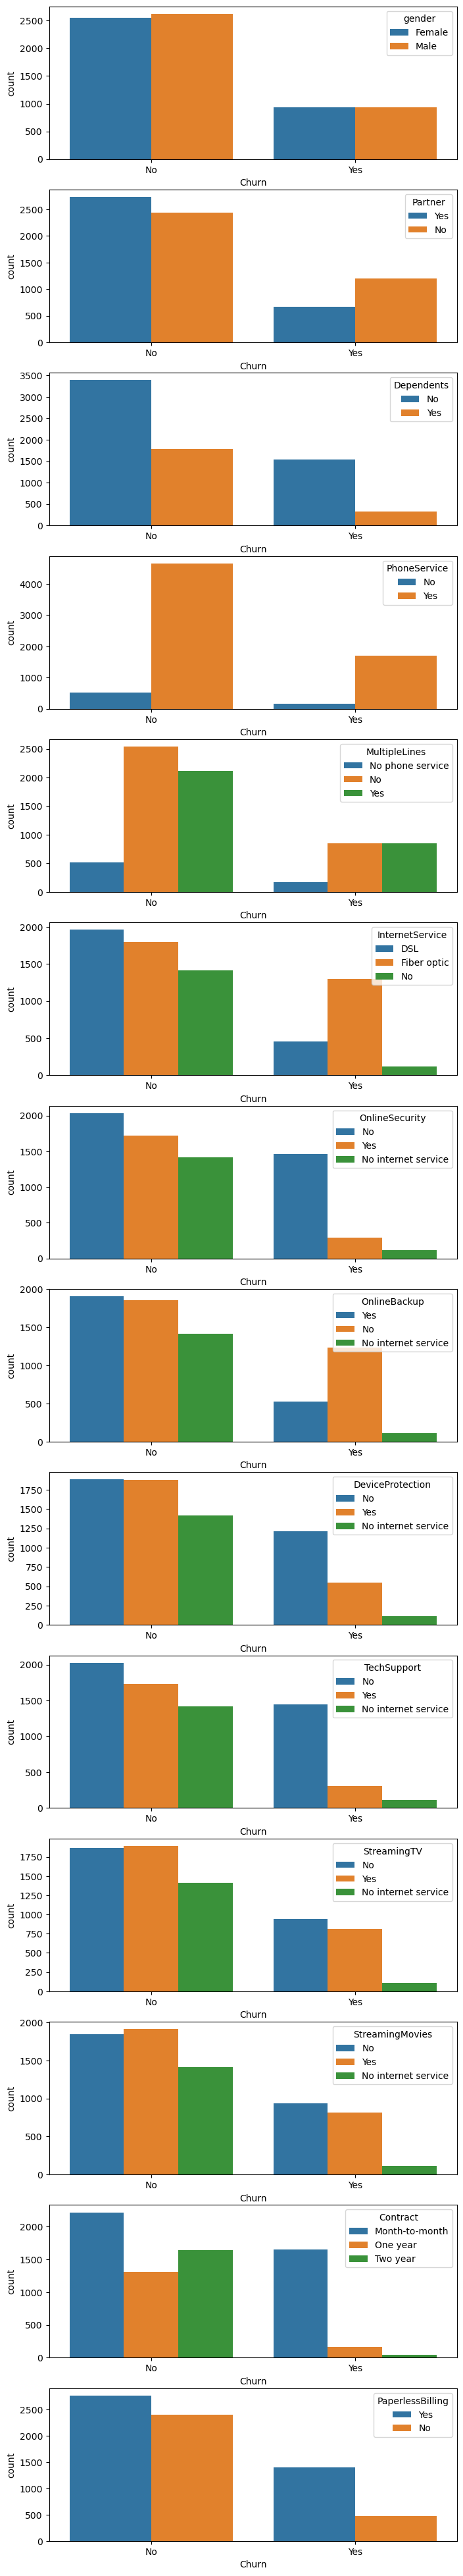

In [25]:
fir,ax = plt.subplots(len(two_three_categorical_columns)-1 , figsize=(8,50))
for i in range(len(two_three_categorical_columns)-1):
    plt.sca(ax[i])
    sns.countplot(x='Churn', data= churn_data, hue = two_three_categorical_columns[i])
    
    

<Axes: xlabel='gender', ylabel='count'>

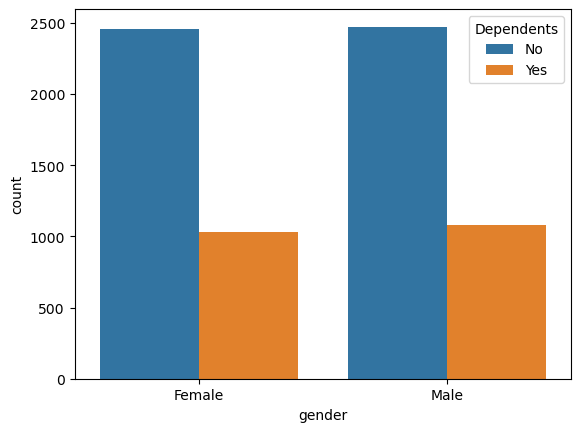

In [26]:
sns.countplot(x= 'gender', data = churn_data , hue= 'Dependents')

<Axes: >

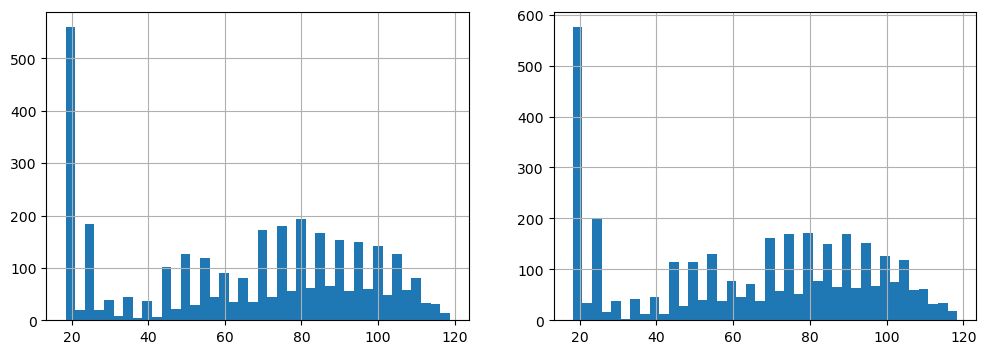

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(121)
churn_data[churn_data['gender']=='Female']['MonthlyCharges'].hist(bins=40)
plt.subplot(122)
churn_data[churn_data['gender']=='Male']['MonthlyCharges'].hist(bins=40)

<Axes: xlabel='gender', ylabel='TotalCharges'>

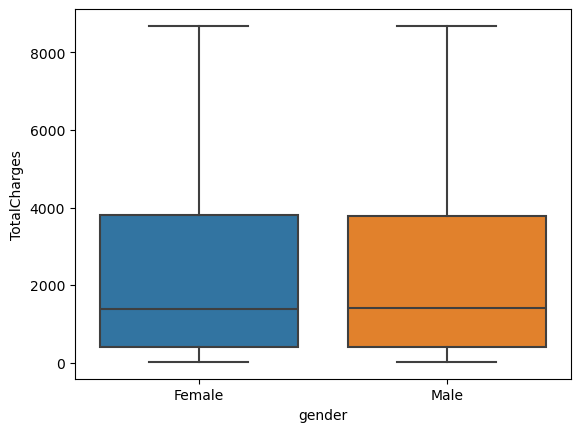

In [28]:
sns.boxplot(y= 'TotalCharges', x = 'gender', data = churn_data)

# <a id = '4.3'>4.3 multivariate visualization </a>

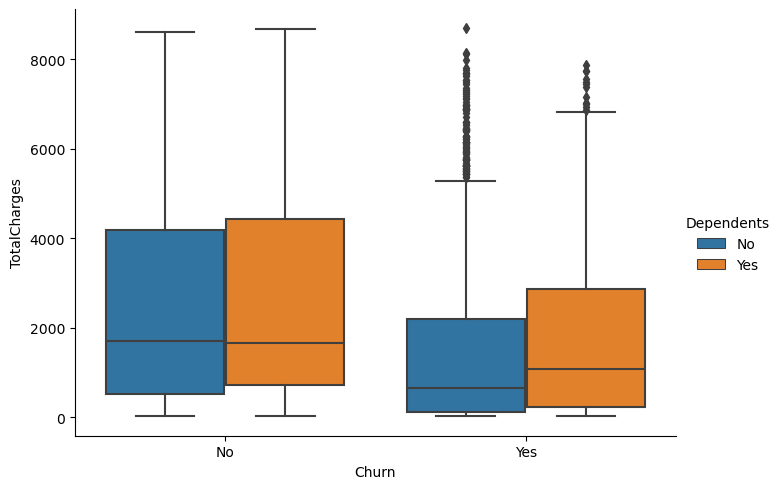

In [29]:
sns.catplot(y= 'TotalCharges', x = 'Churn', data = churn_data,hue= 'Dependents',
            kind= 'box', height=5, aspect=1.4)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

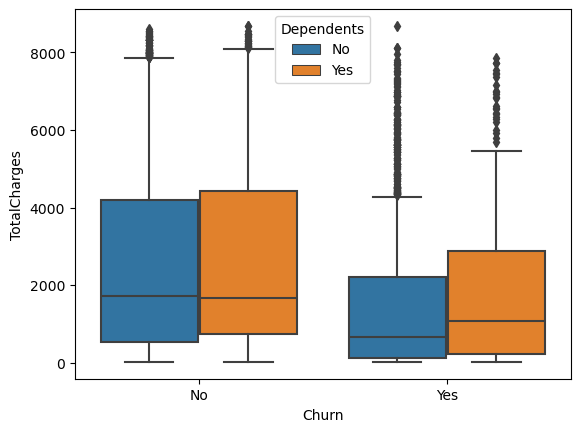

In [30]:
sns.boxplot(y= 'TotalCharges', x = 'Churn', data = churn_data,hue= 'Dependents',whis=1)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

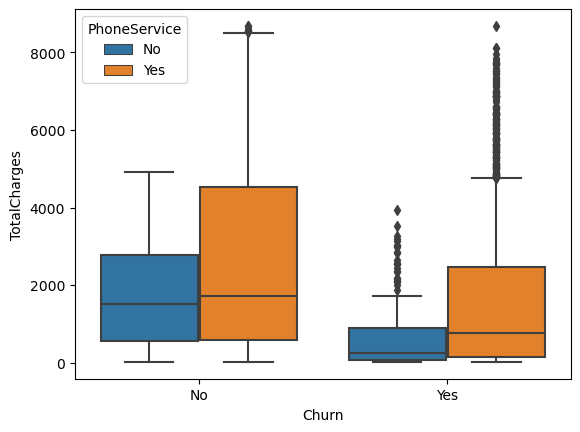

In [31]:
sns.boxplot(y= 'TotalCharges', x = 'Churn', data = churn_data,hue= 'PhoneService', whis=1)
            

# comment:
- who has no phone service has low total charges ( no churn )--> customer with low total charges can not afford the phone service <br>
- who has yes phone service has high total charges ( no churn )<br>
- who has no phone service has lowest total charges ( yes churn )<br>
- who has yes phone service has low total charges ( yes churn ) customer with low total charges can not afford the phone service , so he may left the company for this reason , so the company should advised the these customer not to get the phone services  <br>




In [32]:
month_charge_median = churn_data['MonthlyCharges'].median()
total_charge_median = churn_data['TotalCharges'].median()
total_charge_median

1397.475

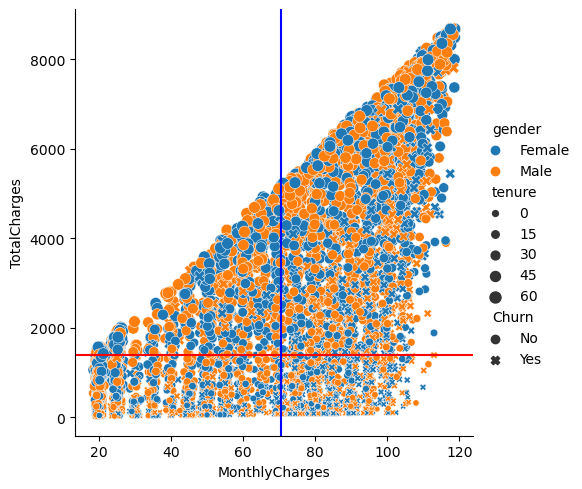

In [33]:
sns.relplot(x='MonthlyCharges', y= 'TotalCharges', data= churn_data, hue='gender', style = 'Churn', 
            size='tenure')
plt.axhline(total_charge_median, color = 'r')
plt.axvline(month_charge_median, color = 'b')

plt.show()

comment:<br>
there is a a week positive correlation between monthy charges and total charges <br>
becuse we can some how drow a best fit line 

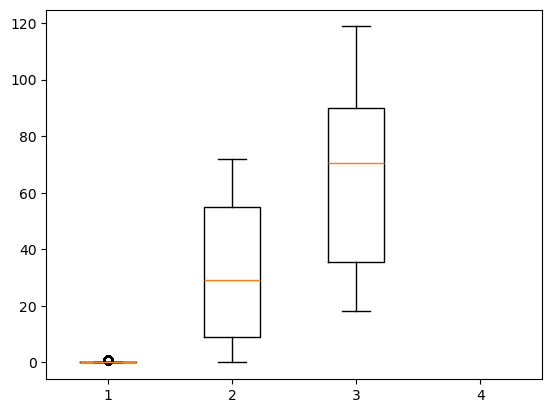

In [34]:
numerical_columns = churn_data.select_dtypes(include='number')
plt.boxplot(numerical_columns);


# <a id = '4.4'>4.4 Correlation Matrix </a>

<Axes: >

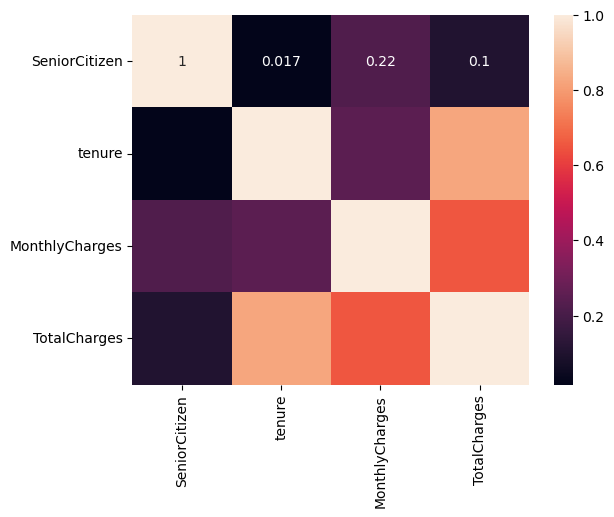

In [35]:
sns.heatmap(churn_data.corr(numeric_only=True), annot=True)

# <a id = '5'>5. Data preprocessing </a>

In [36]:
# separate the target column
y = churn_data.pop('Churn')
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

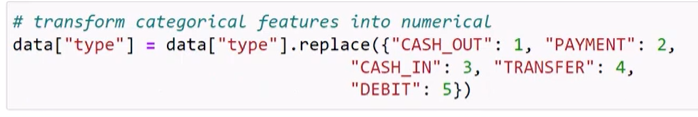

In [37]:
# apply label encoding for the target
# y = y.apply(lambda x : x.replace('Yes', '1' ) if x =='Yes' else  x.replace('No', '0' ))
# or 
##  mapper = {'Yes':1, 'No':0} 
##  y_train_set_final = y_train_set.map(mapper)
# or
# y = y.replace({'Yes':1, 'No':0})
# or
y = y.apply(lambda x : 1 if x == 'Yes' else 0)
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [38]:
# drop the customerID column 
X = churn_data.drop('customerID', axis = 1)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [39]:
X_train, X_test ,y_train, y_test = train_test_split(X,y, test_size=0.3, shuffle=True, random_state=42)

In [40]:
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (4930, 19)
y_train shape --  (4930,)
X_test shape --  (2113, 19)
y_test shape --  (2113,)


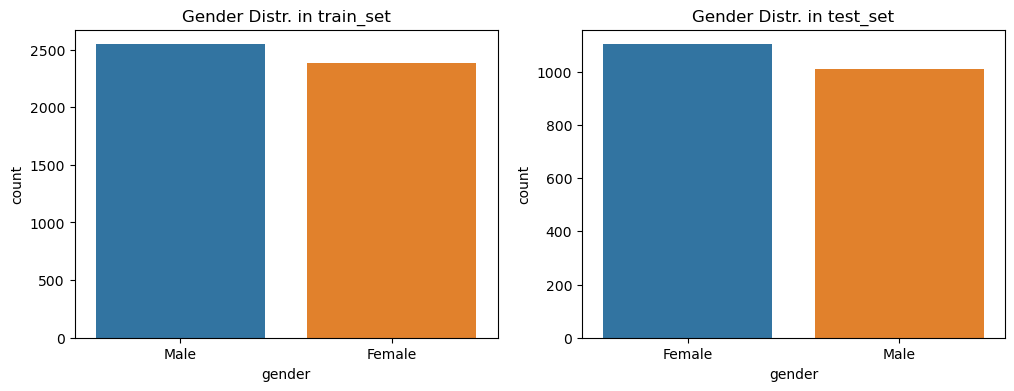

In [41]:
## let's check our results with visualization
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

plt.sca(ax[0])
sns.countplot(x='gender', data=X_train)
plt.title('Gender Distr. in train_set')

plt.sca(ax[1])
sns.countplot(x='gender', data=X_test)
plt.title('Gender Distr. in test_set');    ### mission complete , the same exactly what i want

In [42]:
# numerical columns ( just list of columns names not the columns itself )
numerical_col_list =X.select_dtypes(include='number').columns
numerical_col_list

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [43]:
categorical_columns_list = [x for x in X if X[x].dtype == 'object']
categorical_columns_list

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [44]:
# # list of 2 categorical columns ( just list of columns names not the columns itself )
# categorical_pinary_columns_list = [x for x in X.drop('SeniorCitizen', axis = 1) if len(X[x].unique()) <3 ]
# categorical_pinary_columns_list

In [45]:
# #list of more than 2  categorical columns ( just list of columns names not the columns itself )
# categorical_columns_listt = [x for x in X if len(X[x].unique()) > 2 and len(X[x].unique()) < 5 ]
# categorical_columns_listt

In [46]:
numerical_col_pipeline = Pipeline(steps=[('selector', DataFrameSelector(numerical_col_list)), 
                                         ('imputer', SimpleImputer(strategy='median')),
                                         ('scaler', StandardScaler())
                                         ])

categorical_columns_pipeline = Pipeline(steps=[('selector', DataFrameSelector(categorical_columns_list)), 
                                          ('imputer', SimpleImputer(strategy= 'constant' , fill_value='missing')),
                                          ('onehotencoding',OneHotEncoder(sparse_output=False) )
                                         ])
total_pipelinee = FeatureUnion(transformer_list= [('num_pip',numerical_col_pipeline),
                                                 ('cat_col_pip',categorical_columns_pipeline)])


X_train_final = total_pipelinee.fit_transform(X_train)
X_test_final = total_pipelinee.transform(X_test)

In [47]:
X_train_final

array([[-0.43683092,  0.88107786,  0.19592677, ...,  0.        ,
         1.        ,  0.        ],
       [-0.43683092, -1.28426262,  0.52275463, ...,  0.        ,
         1.        ,  0.        ],
       [-0.43683092, -0.79399685, -1.50955058, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.43683092, -0.83485233, -1.44816666, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.28921522, -0.83485233,  1.14986595, ...,  0.        ,
         1.        ,  0.        ],
       [-0.43683092, -0.2628756 , -1.49296033, ...,  1.        ,
         0.        ,  0.        ]])

In [48]:
X_train_final = pd.DataFrame(X_train_final)
X_train_final

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,-0.436831,0.881078,0.195927,0.653957,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.436831,-1.284263,0.522755,-0.975738,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.436831,-0.793997,-1.509551,-0.896626,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2.289215,-0.344587,1.053643,-0.011513,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.289215,-1.079985,0.308740,-0.812148,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-0.436831,-1.284263,1.002213,-0.969355,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4926,-0.436831,-0.385442,0.872809,-0.040290,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4927,-0.436831,-0.834852,-1.448167,-0.876130,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4928,2.289215,-0.834852,1.149866,-0.481191,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
X_train_final.shape , y_train.shape

((4930, 45), (4930,))

In [50]:
# to study the correlation between the 1st 4 num coulmns with the target(after convertint to num)
new_data = pd.DataFrame(np.c_[X_train_final.iloc[:, :4], y_train],  
                      columns=['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'])


In [51]:
new_data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.006708,0.218325,0.093403,0.151383
tenure,0.006708,1.000000,0.250315,0.825988,-0.344889
MonthlyCharges,0.218325,0.250315,1.000000,0.652180,0.188390
TotalCharges,0.093403,0.825988,0.652180,1.000000,-0.194574
Churn,0.151383,-0.344889,0.188390,-0.194574,1.000000


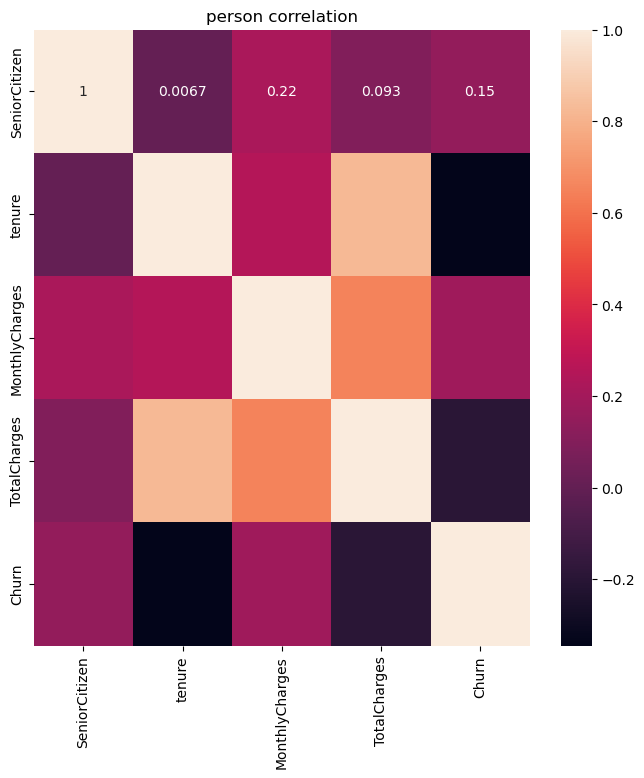

In [52]:
plt.figure(figsize=(8,8))
sns.heatmap(new_data.corr(), annot=True)
plt.title('person correlation');

# <a id = '6'>6. Model Building </a> 

metrics = accuracy

# <a id = '6.1'>6.1 baseline model</a>

In [53]:
log_reg_model = LogisticRegression(max_iter=1000)

In [54]:
log_reg_model.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000)

In [55]:
log_reg_model.max_iter

1000

In [56]:
log_reg_model.score(X_train_final, y_train)

0.8056795131845842

In [57]:
y_predict = log_reg_model.predict(X_train_final)

In [58]:
y_predict_pro = log_reg_model.predict_proba(X_train_final)

In [59]:
y_predict_pro[:10], 

(array([[0.93911178, 0.06088822],
        [0.30467004, 0.69532996],
        [0.93383444, 0.06616556],
        [0.70903249, 0.29096751],
        [0.39221894, 0.60778106],
        [0.38763109, 0.61236891],
        [0.71267706, 0.28732294],
        [0.75123324, 0.24876676],
        [0.9126538 , 0.0873462 ],
        [0.90292829, 0.09707171]]),)

In [60]:
y_predict_pro[:,0]

array([0.93911178, 0.30467004, 0.93383444, ..., 0.80075716, 0.22070709,
       0.964362  ])

In [61]:
y_predict_pro[:,1].shape , 

((4930,),)

In [62]:
 y_train.shape

(4930,)

In [63]:
cm = confusion_matrix(y_train , y_predict)
cm

array([[3278,  357],
       [ 601,  694]], dtype=int64)

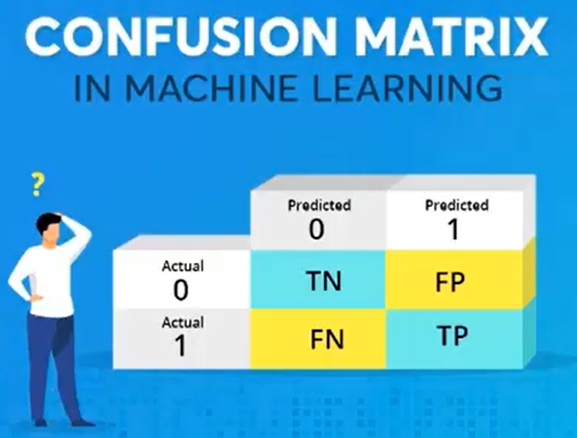

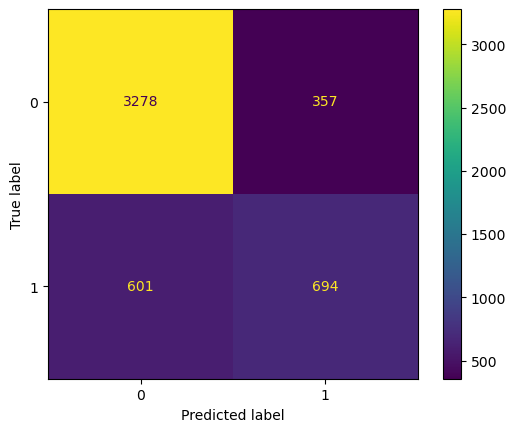

In [64]:
ConfusionMatrixDisplay(cm).plot()

<Axes: >

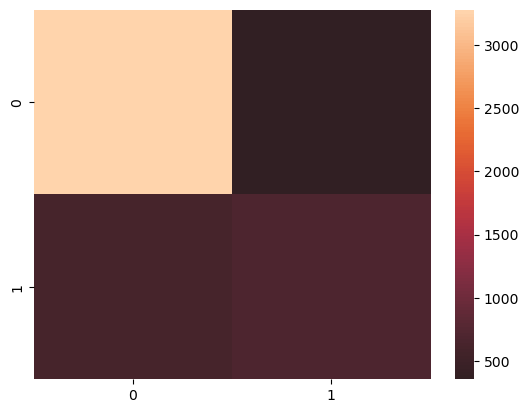

In [65]:
sns.heatmap(cm, center= True)

In [66]:
accuracy_score(y_train, y_predict)

0.8056795131845842

In [67]:
recall_score(y_train, y_predict)

0.5359073359073359

In [68]:
precision_score(y_train, y_predict)

0.6603235014272122

In [69]:
f1_score(y_train, y_predict)

0.5916453537936914

In [70]:
y_predict_pro.shape , y_predict.shape , y_train.shape

((4930, 2), (4930,), (4930,))

In [71]:
y_cross_predict_decision_method  = cross_val_predict(estimator =log_reg_model, X = X_train_final, y = y_train, cv= 5,
                                    n_jobs=1, method= 'decision_function')
y_cross_predict_decision_method

array([-2.86093947,  0.84123562, -2.5671124 , ..., -1.3835019 ,
        1.37459541, -3.20347996])

In [72]:
precision_val1, recalls_val1, thresholds_vals1 = precision_recall_curve(y_train, y_cross_predict_decision_method)

In [73]:
precision_val1.shape , recalls_val1.shape , thresholds_vals1.shape

((4928,), (4928,), (4927,))

In [74]:
precision_val1

array([0.26267748, 0.26273078, 0.26278409, ..., 1.        , 1.        ,
       1.        ])

In [75]:
recalls_val1

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       1.54440154e-03, 7.72200772e-04, 0.00000000e+00])

In [76]:
thresholds_vals1

array([-6.98270507, -6.89724222, -6.81245185, ...,  1.56204357,
        1.6377478 ,  1.70213422])

Text(0.5, 0, 'recall')

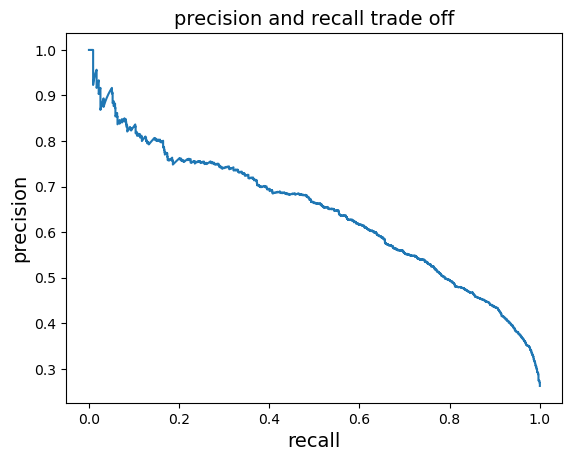

In [77]:
plt.plot(recalls_val1, precision_val1)
plt.title('precision and recall trade off', fontsize = 14)
plt.ylabel('precision', fontsize = 14)
plt.xlabel('recall', fontsize = 14)

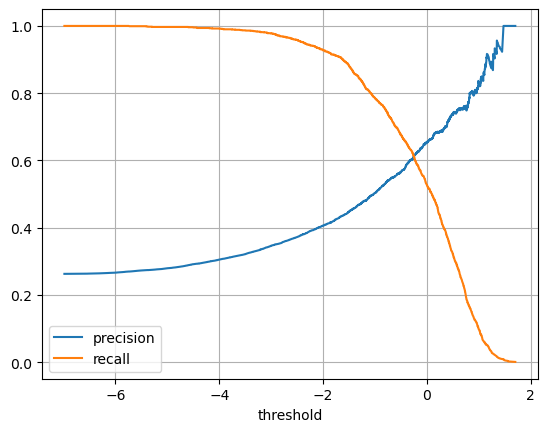

In [78]:
plt.plot(thresholds_vals1, precision_val1[:-1], label = 'precision')
plt.plot(thresholds_vals1, recalls_val1[:-1],  label='recall')
plt.xlabel('threshold')
plt.legend()
plt.grid()

In [79]:
y_cross_score = cross_val_score(estimator=log_reg_model, X = X_train_final, y= y_train , cv= 5 , n_jobs=-1, scoring='accuracy')

In [80]:
y_cross_score 

array([0.80628803, 0.81744422, 0.78803245, 0.79411765, 0.80831643])

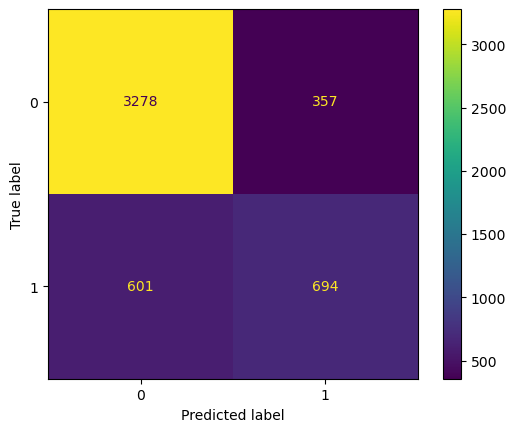

In [81]:
ConfusionMatrixDisplay(cm).plot()

In [82]:
fpr, tpr, thresholds = roc_curve(y_train, y_cross_predict_decision_method)

In [83]:
fpr, tpr, thresholds

(array([0.       , 0.       , 0.       , ..., 0.9650619, 0.9650619,
        1.       ]),
 array([0.00000000e+00, 7.72200772e-04, 9.26640927e-03, ...,
        9.99227799e-01, 1.00000000e+00, 1.00000000e+00]),
 array([        inf,  1.70213422,  1.47284836, ..., -5.73387399,
        -5.74462629, -6.98270507]))

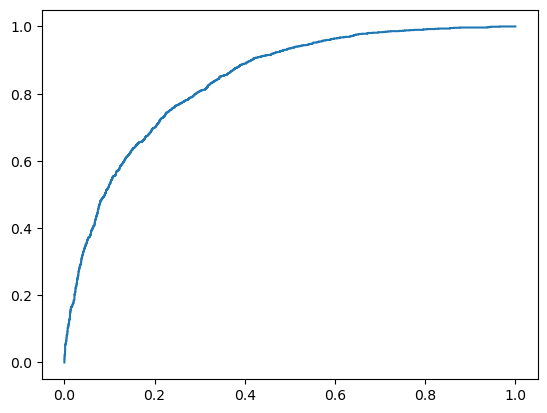

In [84]:
plt.plot(fpr, tpr)

In [85]:
auc = auc(fpr, tpr)
auc

0.8386311758801442

In [86]:
auc_score = roc_auc_score(y_train, y_cross_predict_decision_method)
auc_score

0.8386311758801442

## model training
metrics = Accuracy 

In [87]:
def cross_val(model, X_train, y_train, case):
    # some models not working with decision_function method so put if condition to change the method to predict_proba, so use paramter case
    model.fit(X_train, y_train)
    y_predict = model.predict(X_train)
    accuracy_model = accuracy_score(y_train, y_predict)
    score_model = model.score(X_train,y_train)
    if case ==1 :
        
        y_cross_prdict_model = cross_val_predict(estimator=model, X= X_train, y=y_train, cv= 5, n_jobs=-1, 
                                             method='decision_function'  )
        y_cross_score_model = cross_val_score(estimator=model, X= X_train, y=y_train, cv= 5, n_jobs=-1,scoring='accuracy')
        precision_val_f , recall_val_f, threshold_val_f = precision_recall_curve(y_train, y_cross_prdict_model)
        fpr_f, tpr_f,thresholds_f = roc_curve(y_train,y_cross_prdict_model)
        auc_score = roc_auc_score(y_train,y_cross_prdict_model)
    else :
        y_cross_prdict_model = cross_val_predict(estimator=model, X= X_train, y=y_train, cv= 5, n_jobs=-1, 
                                             method='predict_proba'  )
        y_cross_score_model = cross_val_score(estimator=model, X= X_train, y=y_train, cv= 5, n_jobs=-1,scoring='accuracy')
        
        precision_val_f , recall_val_f, threshold_val_f = precision_recall_curve(y_train, y_cross_prdict_model[:, 1])
        fpr_f, tpr_f,thresholds_f = roc_curve(y_train,y_cross_prdict_model[:, 1])
        auc_score = roc_auc_score(y_train,y_cross_prdict_model[:, 1])
  
   
    print(f'y_cross_score_model = {y_cross_score_model}')
    print('==='*20)
    print(f'auc_score = {auc}')
    print('==='*20)
    print(f'model_score = {score_model}')
    print('==='*20)
    print(f'accuracy_model = {accuracy_model}')
    
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    confus_model = confusion_matrix(y_train, y_predict)  
    # plot precison_recall curve
    plt.sca(ax[0])
    plt.plot(threshold_val_f, precision_val_f[:-1], 'g-', label='Precision')
    plt.plot(threshold_val_f, recall_val_f[:-1], 'b--', label='Recall')
    plt.title('Precision and Recall vs. thresholds Possible')
    plt.xlabel('Thresholds', fontsize=14)
    plt.legend()
    
    ## plot roc_curve
    plt.sca(ax[1])
    plt.plot(fpr_f, tpr_f, 'b--')
    plt.plot([0,1], [0,1], 'k--')
    plt.title('TPR vs. FPR')
    plt.xlabel('FPR == (1-Specificity)', fontsize=14)
    plt.ylabel('FPR == (Recall)', fontsize=14)
    plt.show()

#     fig1, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
#     plt.sca(ax1[1])
    plt.subplot(1,1,1)
    plt.plot(recall_val_f, precision_val_f)
    plt.title('precision and recall trade off', fontsize = 14)
    plt.ylabel('precision', fontsize = 14)
    plt.xlabel('recall', fontsize = 14)    
    
#     plt.sca(ax1[0])  
    ConfusionMatrixDisplay(confus_model).plot()
    
   
  

model 1

In [88]:
log_reg_model_1 = LogisticRegression(max_iter=2000)

y_cross_score_model = [0.80628803 0.81744422 0.78803245 0.79411765 0.80831643]
auc_score = 0.8386311758801442
model_score = 0.8056795131845842
accuracy_model = 0.8056795131845842


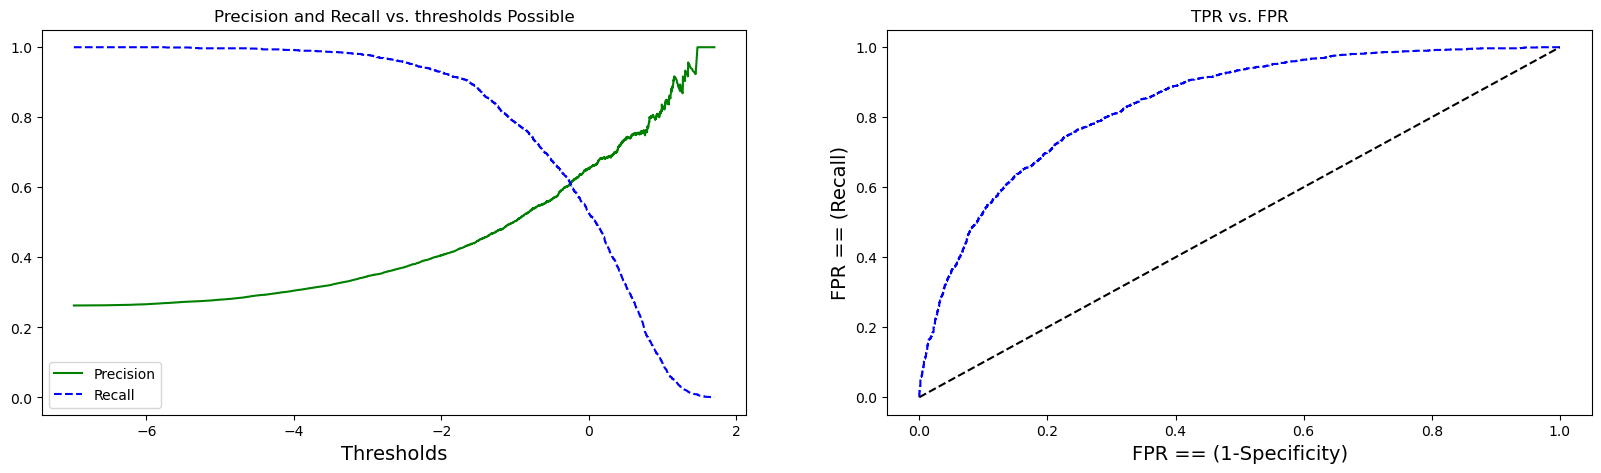

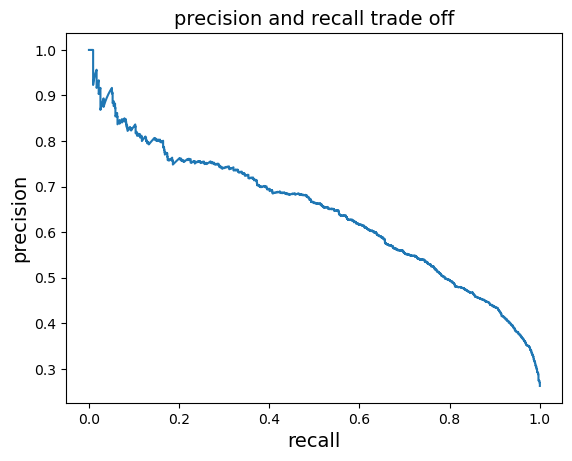

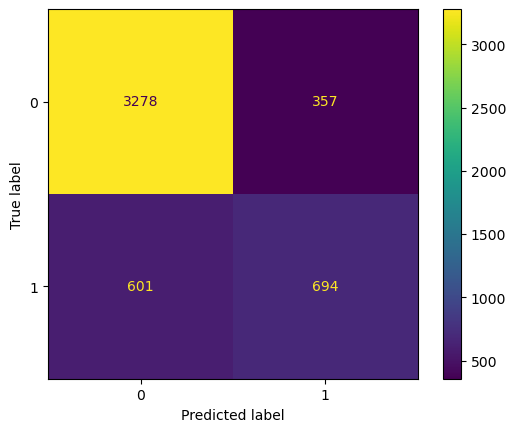

In [89]:
cross_val(log_reg_model_1, X_train_final, y_train, 1)

# <a id = '6.2'>6.2 model 2 </a>

random forest 

In [90]:
random_forest_cls = RandomForestClassifier(max_depth=8, n_jobs=-1 , n_estimators= 750, criterion='entropy', random_state= 42)

y_cross_score_model = [0.81135903 0.80730223 0.79208925 0.79006085 0.80020284]
auc_score = 0.8386311758801442
model_score = 0.8273833671399594
accuracy_model = 0.8273833671399594


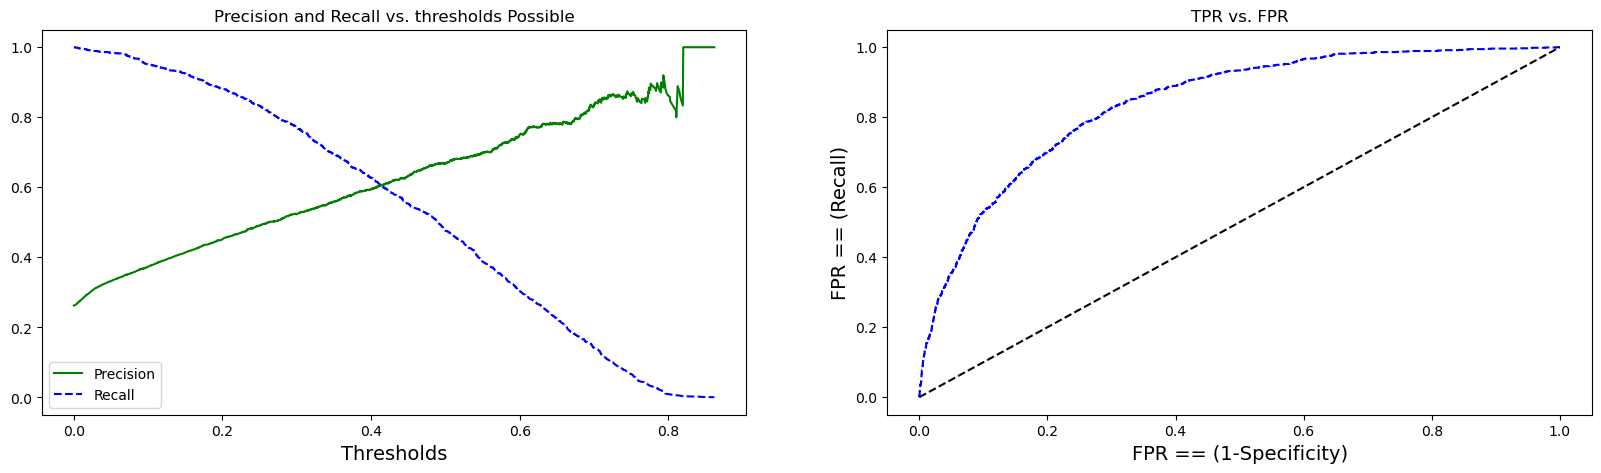

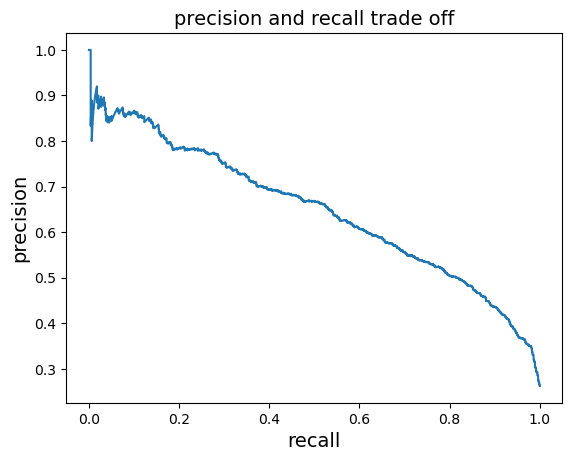

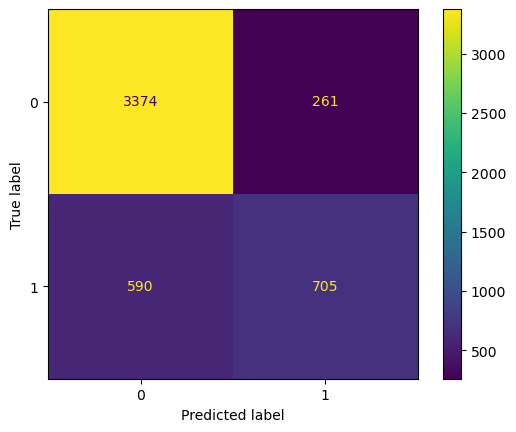

In [91]:
cross_val(random_forest_cls, X_train_final, y_train, 2)

# <a id = '6.3'>6.3 model 3 </a>

XGBOST

In [92]:
xgbost_model = xgboost.XGBClassifier()
xgbost_model.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [98]:
params_best_xgb = {'n_estimators':np.arange(100, 500, 100),
                 'max_depth':np.arange(4,20,2) ,
                 'learning_rate': [0.1, 0.2],
                  'booster': ['gbtree'],
                  'objective': ['binary:logistic']}

### using GridSearchCV
grid_cv_xgb = GridSearchCV(xgbost_model, param_grid=params_best_xgb, cv=6, 
                        scoring='accuracy', n_jobs=-1, verbose=2)         

In [99]:
grid_cv_xgb.fit(X_train_final, y_train)

Fitting 6 folds for each of 64 candidates, totalling 384 fits


GridSearchCV(cv=6,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                         'n_estimators': array([100, 200, 300, 400]),
                         'objective': ['binary:logistic']},
             scoring='accuracy', verbose=2)

In [100]:
grid_cv_xgb.best_params_

{'booster': 'gbtree',
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 100,
 'objective': 'binary:logistic'}

In [102]:
xgbost_model_train = grid_cv_xgb.best_estimator_

y_cross_score_model = [0.81947262 0.79614604 0.79614604 0.79208925 0.80020284]
auc_score = 0.8386311758801442
model_score = 0.8296146044624746
accuracy_model = 0.8296146044624746


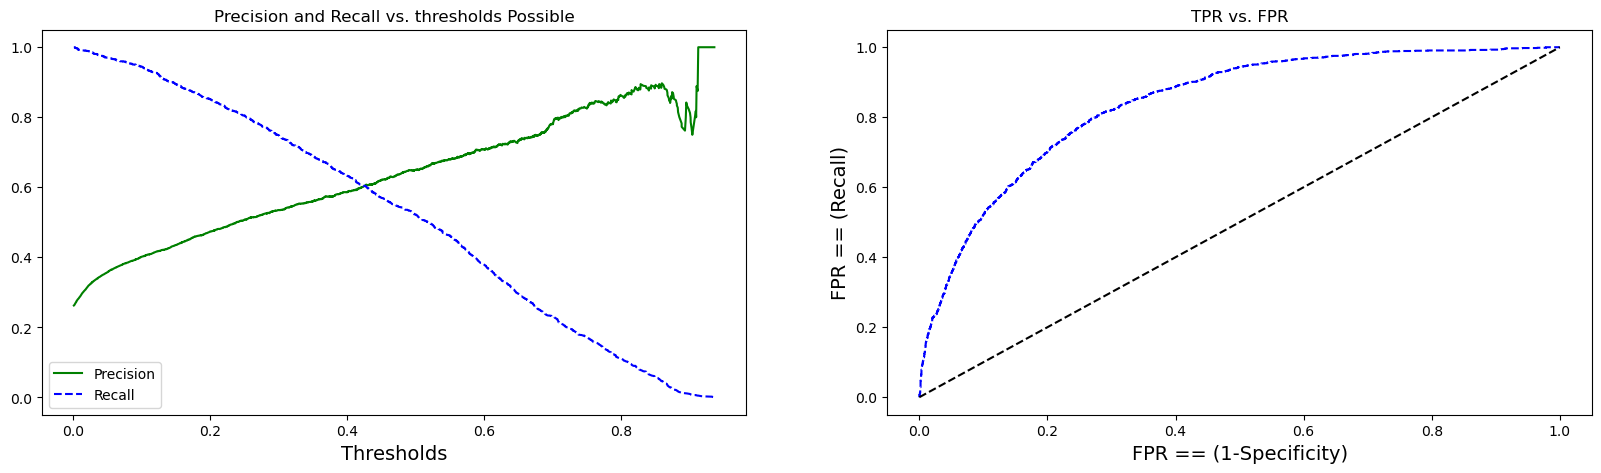

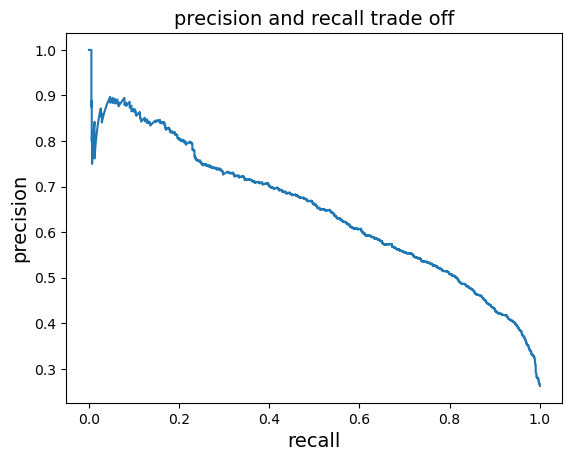

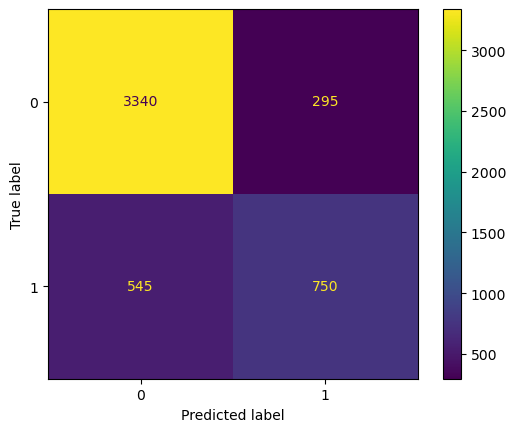

In [103]:
cross_val(xgbost_model_train, X_train_final, y_train, 2)

# <a id = '6.4'>6.4 model 4 </a>

y_cross_score_model = [0.81744422 0.81541582 0.79716024 0.79006085 0.81135903]
auc_score = 0.8386311758801442
model_score = 0.824340770791075
accuracy_model = 0.824340770791075


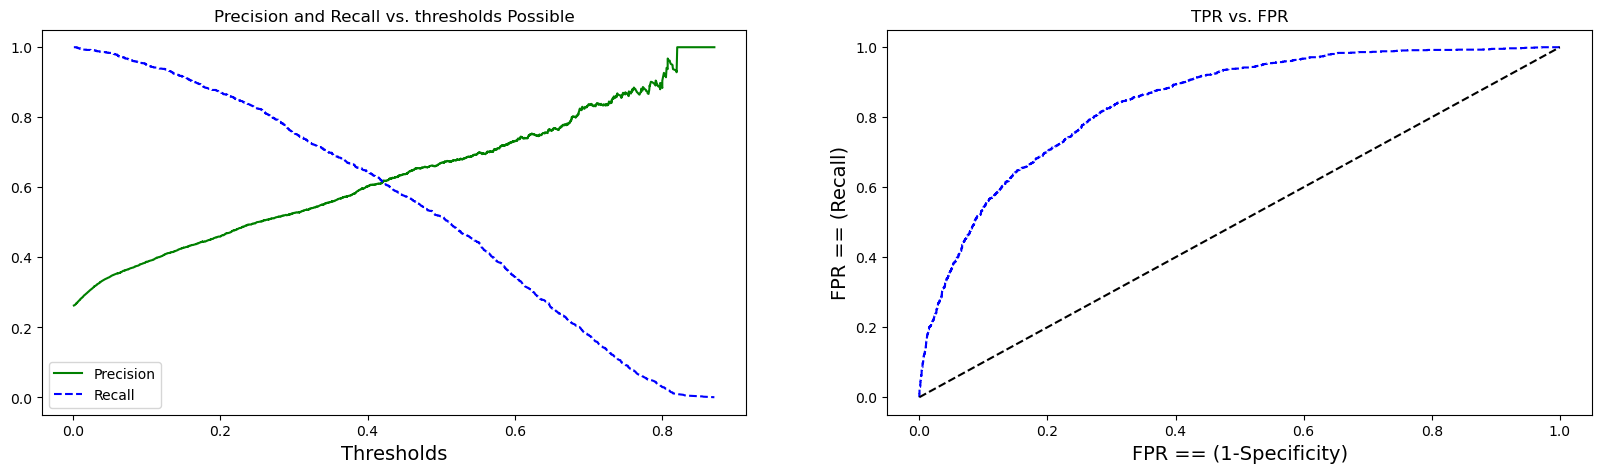

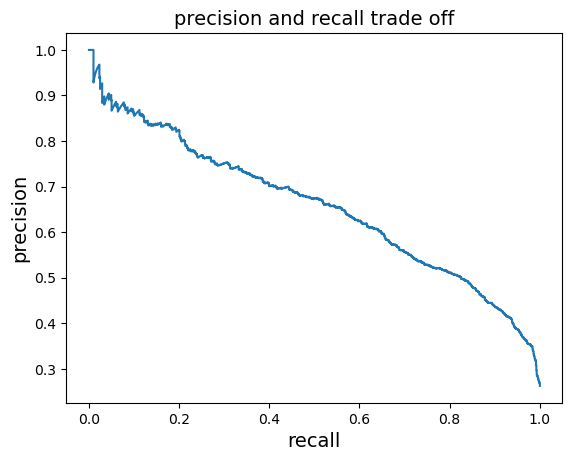

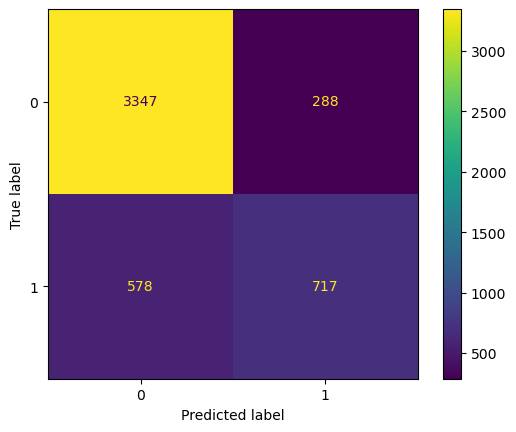

In [107]:
## try VotingClassifier
voting_clf = VotingClassifier([
                                ('logistic', log_reg_model),
                                ('forest', random_forest_cls),                  
                                ('xgboost', xgbost_model_train)],
                                voting='soft')

voting_clf.fit(X_train_final, y_train)

## call the cross_val Function
cross_val(voting_clf, X_train_final, y_train, 2) 

# <a id = '7'>7  best model </a>

xgbost is the best model with accuracy 0.8296146044624746